# Sentiment Classification with NumPy

### Outline:

- [Explore Dataset](#header_1)

- [Develop and Validate a Predictive Theory](#header_2)

- [Transforming Text Into Numbers](#header_3)

- [Building a Neural Network](#header_4)

- [Weight Analysis](#header_5)

# Explore Dataset <a id= "header_1"></a>

We have movie reviews from IMDB. Reveiws that had less than 3 stars were considered negative.

In [3]:
# Get our data 
f = open("reviews.txt", "r")
reviews = [review[:-1] for review in f.readlines()] 
f.close()

# Get our labels
f = open("labels.txt", "r")
labels = [label[:-1].upper() for label in f.readlines()]
f.close()

In [4]:
len(reviews) # 25 thousand movie reviews

25000

In [5]:
reviews[0], labels[0]

('bromwell high is a cartoon comedy . it ran at the same time as some other programs about school life  such as  teachers  . my   years in the teaching profession lead me to believe that bromwell high  s satire is much closer to reality than is  teachers  . the scramble to survive financially  the insightful students who can see right through their pathetic teachers  pomp  the pettiness of the whole situation  all remind me of the schools i knew and their students . when i saw the episode in which a student repeatedly tried to burn down the school  i immediately recalled . . . . . . . . . at . . . . . . . . . . high . a classic line inspector i  m here to sack one of your teachers . student welcome to bromwell high . i expect that many adults of my age think that bromwell high is far fetched . what a pity that it isn  t   ',
 'POSITIVE')

# Develop and Validate a Predictive Theory <a id="header_2"></a>

In [6]:
def pretty_print_review_and_label(*indices):
    print("labels.txt \t : \t reviews.txt \n")
    for i in indices:
        print(f"{labels[i]} \t : \t {reviews[i][:80]}...")

In [7]:
pretty_print_review_and_label(2137, 
                              12816, 
                              6267, 
                              21934, 
                              5297, 
                              4998)

labels.txt 	 : 	 reviews.txt 

NEGATIVE 	 : 	 this movie is terrible but it has some good effects .  ...
POSITIVE 	 : 	 adrian pasdar is excellent is this film . he makes a fascinating woman .  ...
NEGATIVE 	 : 	 comment this movie is impossible . is terrible  very improbable  bad interpretat...
POSITIVE 	 : 	 excellent episode movie ala pulp fiction .  days   suicides . it doesnt get more...
NEGATIVE 	 : 	 if you haven  t seen this  it  s terrible . it is pure trash . i saw this about ...
POSITIVE 	 : 	 this schiffer guy is a real genius  the movie is of excellent quality and both e...


It seems there are some correlations between the number of occurrences of some words and the labels. Let's do a quick validation:

In [8]:
from collections import Counter
import numpy as np

We'll create three `Counter` objects, one for words from postive reviews, one for words from negative reviews, and one for all the words.

In [9]:
positive_counts = Counter()
negative_counts = Counter()
total_counts = Counter()

In [10]:
for i in range(len(reviews)):
    words = reviews[i].split(" ")
    for word in words:
        total_counts[word] += 1 
        if labels[i] == "POSITIVE":
            positive_counts[word] += 1
        else:
            negative_counts[word] += 1

Examine the counts of most common words in negative and positive reviews (sorted from most to least common):

In [11]:
positive_counts.most_common()

[('', 550468),
 ('the', 173324),
 ('.', 159654),
 ('and', 89722),
 ('a', 83688),
 ('of', 76855),
 ('to', 66746),
 ('is', 57245),
 ('in', 50215),
 ('br', 49235),
 ('it', 48025),
 ('i', 40743),
 ('that', 35630),
 ('this', 35080),
 ('s', 33815),
 ('as', 26308),
 ('with', 23247),
 ('for', 22416),
 ('was', 21917),
 ('film', 20937),
 ('but', 20822),
 ('movie', 19074),
 ('his', 17227),
 ('on', 17008),
 ('you', 16681),
 ('he', 16282),
 ('are', 14807),
 ('not', 14272),
 ('t', 13720),
 ('one', 13655),
 ('have', 12587),
 ('be', 12416),
 ('by', 11997),
 ('all', 11942),
 ('who', 11464),
 ('an', 11294),
 ('at', 11234),
 ('from', 10767),
 ('her', 10474),
 ('they', 9895),
 ('has', 9186),
 ('so', 9154),
 ('like', 9038),
 ('about', 8313),
 ('very', 8305),
 ('out', 8134),
 ('there', 8057),
 ('she', 7779),
 ('what', 7737),
 ('or', 7732),
 ('good', 7720),
 ('more', 7521),
 ('when', 7456),
 ('some', 7441),
 ('if', 7285),
 ('just', 7152),
 ('can', 7001),
 ('story', 6780),
 ('time', 6515),
 ('my', 6488),
 ('g

In [12]:
negative_counts.most_common()

[('', 561462),
 ('.', 167538),
 ('the', 163389),
 ('a', 79321),
 ('and', 74385),
 ('of', 69009),
 ('to', 68974),
 ('br', 52637),
 ('is', 50083),
 ('it', 48327),
 ('i', 46880),
 ('in', 43753),
 ('this', 40920),
 ('that', 37615),
 ('s', 31546),
 ('was', 26291),
 ('movie', 24965),
 ('for', 21927),
 ('but', 21781),
 ('with', 20878),
 ('as', 20625),
 ('t', 20361),
 ('film', 19218),
 ('you', 17549),
 ('on', 17192),
 ('not', 16354),
 ('have', 15144),
 ('are', 14623),
 ('be', 14541),
 ('he', 13856),
 ('one', 13134),
 ('they', 13011),
 ('at', 12279),
 ('his', 12147),
 ('all', 12036),
 ('so', 11463),
 ('like', 11238),
 ('there', 10775),
 ('just', 10619),
 ('by', 10549),
 ('or', 10272),
 ('an', 10266),
 ('who', 9969),
 ('from', 9731),
 ('if', 9518),
 ('about', 9061),
 ('out', 8979),
 ('what', 8422),
 ('some', 8306),
 ('no', 8143),
 ('her', 7947),
 ('even', 7687),
 ('can', 7653),
 ('has', 7604),
 ('good', 7423),
 ('bad', 7401),
 ('would', 7036),
 ('up', 6970),
 ('only', 6781),
 ('more', 6730),
 ('

Most common words are the words like `the`, `a`, etc. That's not what we want. We want the words found in positive reviews more often than in negative reviews, and vice versa. To accomplish this, we'll calculate the `ratios` of word usage between positive and negative reviews.

In [13]:
pos_neg_ratios = Counter()

for word, count in total_counts.most_common():
    if count< 100: # Don't consider very uncommon words
        break
    pos_neg_ratios[word] = positive_counts[word]/ float(negative_counts[word] + 1)

In [14]:
print("Pos-to-neg ratio for 'the' = {}".format(pos_neg_ratios["the"]))
print("Pos-to-neg ratio for 'amazing' = {}".format(pos_neg_ratios["amazing"]))
print("Pos-to-neg ratio for 'terrible' = {}".format(pos_neg_ratios["terrible"]))

Pos-to-neg ratio for 'the' = 1.0607993145235326
Pos-to-neg ratio for 'amazing' = 4.022813688212928
Pos-to-neg ratio for 'terrible' = 0.17744252873563218


- Positive Words : have a ratio greater than 1
- Negative Words : have a ratio less than zero (closer to 0 is more negative)
- A perfectly neutral word : would be almost exactly 1

Values we've calculated are a bit difficult to work with. A very positive word like "amazing" has a value above 4, whereas a very negative word like "terrible" has a value around 0.18. Those values aren't easy to compare for a couple of reasons:

* Right now, 1 is considered neutral, but the absolute value of the postive-to-negative rations of very postive words is larger than the absolute value of the ratios for the very negative words. So there is no way to directly compare two numbers and see if one word conveys the same magnitude of positive sentiment as another word conveys negative sentiment. So we should center all the values around netural so the absolute value from neutral of the postive-to-negative ratio for a word would indicate how much sentiment (positive or negative) that word conveys.
* When comparing absolute values it's easier to do that around zero than one.


To fix these issues, we'll convert all of our ratios to new values using logarithms.

In [15]:
for word, count in pos_neg_ratios.items():
    pos_neg_ratios[word] = np.log(count)

In [16]:
print("Pos-to-neg ratio for 'the' = {}".format(pos_neg_ratios["the"]))
print("Pos-to-neg ratio for 'amazing' = {}".format(pos_neg_ratios["amazing"]))
print("Pos-to-neg ratio for 'terrible' = {}".format(pos_neg_ratios["terrible"]))

Pos-to-neg ratio for 'the' = 0.05902269426102881
Pos-to-neg ratio for 'amazing' = 1.3919815802404802
Pos-to-neg ratio for 'terrible' = -1.7291085042663878


Neutral words will be close to `0`, words will get more positive as their ratios approach and go above `1`, and words will get more negative as their ratios approach and go below `-1`. That's why we decided to use the logs instead of the raw ratios.

In [17]:
# words most frequently seen in a review with a "POSITIVE" label
pos_neg_ratios.most_common()[30:70]

[('lumet', 1.7462970951512977),
 ('elvira', 1.739703107272002),
 ('underrated', 1.7197859696029656),
 ('gripping', 1.7165360479904674),
 ('superb', 1.7091514458966952),
 ('delight', 1.6714733033535532),
 ('welles', 1.667706820558076),
 ('sadness', 1.663505133704376),
 ('sinatra', 1.6389967146756448),
 ('touching', 1.637217476541176),
 ('timeless', 1.62924053973028),
 ('macy', 1.6211339521972916),
 ('unforgettable', 1.6177367152487956),
 ('favorites', 1.6158688027643908),
 ('stewart', 1.611998733295774),
 ('sullivan', 1.6094379124341003),
 ('extraordinary', 1.6094379124341003),
 ('hartley', 1.6094379124341003),
 ('brilliantly', 1.5950491749820008),
 ('friendship', 1.5677652160335325),
 ('wonderful', 1.5645425925262093),
 ('palma', 1.5553706911638245),
 ('magnificent', 1.54663701119507),
 ('finest', 1.546259010812569),
 ('jackie', 1.5439233053234738),
 ('ritter', 1.540445040947149),
 ('tremendous', 1.5184661342283736),
 ('freedom', 1.5091151908062312),
 ('fantastic', 1.5048433868558566),

In [18]:
# words most frequently seen in a review with a "NEGATIVE" label
pos_neg_ratios.most_common()[-1: -31:-1]

[('boll', -4.969813299576001),
 ('uwe', -4.624972813284271),
 ('seagal', -3.644143560272545),
 ('unwatchable', -3.258096538021482),
 ('stinker', -3.2088254890146994),
 ('mst', -2.9502698994772336),
 ('incoherent', -2.9368917735310576),
 ('unfunny', -2.6922395950755678),
 ('waste', -2.6193845640165536),
 ('blah', -2.5704288232261625),
 ('horrid', -2.4849066497880004),
 ('pointless', -2.4553061800117097),
 ('atrocious', -2.4259083090260445),
 ('redeeming', -2.3682390632154826),
 ('prom', -2.3608540011180215),
 ('drivel', -2.3470368555648795),
 ('lousy', -2.307572634505085),
 ('worst', -2.286987896180378),
 ('laughable', -2.264363880173848),
 ('awful', -2.227194247027435),
 ('poorly', -2.2207550747464135),
 ('wasting', -2.204604684633842),
 ('remotely', -2.1972245773362196),
 ('existent', -2.0794415416798357),
 ('boredom', -1.995100393246085),
 ('miserably', -1.9924301646902063),
 ('sucks', -1.987068221548821),
 ('uninspired', -1.9832976811269336),
 ('lame', -1.981767458946166),
 ('insult

# Transforming Text Into Numbers <a id = "header_3"></a>

In [19]:
from IPython.display import Image

Following image will show the layers of the neural network we'll be building throughout this notebook. `layer_0` is the input layer, `layer_1` is a hidden layer, and `layer_2` is the output layer.

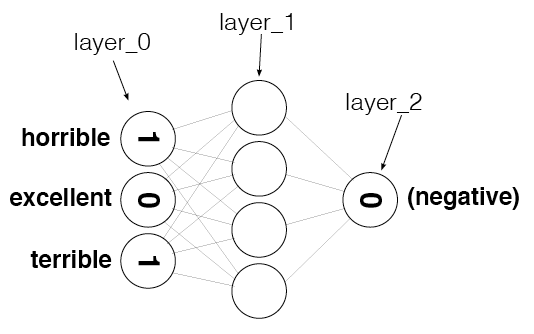

In [20]:
Image("sentiment_network_2.png")

In `layer_0` we need to have the count of each word in the vocabulary for the intended review. 
So we need to build two function: 
1. `update_input_layer` which transforms a review into word counts
2. `get_target_for_label` which transforms review label into 0(negative) or 1(positive)

In [21]:
vocab = set(total_counts.keys())

word2index = {}

for i, word in enumerate(vocab):
    word2index[word] = i
    
word2index

{'': 0,
 'countenance': 1,
 'munnera': 2,
 'actally': 3,
 'multinationals': 4,
 'intro': 5,
 'bondage': 6,
 'thata': 7,
 'misfortunes': 8,
 'innovates': 9,
 'bajillion': 10,
 'rebuffs': 11,
 'specifically': 12,
 'titlesyou': 13,
 'soever': 14,
 'theat': 15,
 'kingdom': 16,
 'bigalow': 17,
 'chiselled': 18,
 'finleyson': 19,
 'foreshadowed': 20,
 'textbook': 21,
 'cedrac': 22,
 'herapheri': 23,
 'nechayev': 24,
 'nippy': 25,
 'autorenfilm': 26,
 'committed': 27,
 'miki': 28,
 'merton': 29,
 'gandhis': 30,
 'foremost': 31,
 'compacted': 32,
 'rations': 33,
 'fastforwarding': 34,
 'sue': 35,
 'yee': 36,
 'tebaldi': 37,
 'wuxia': 38,
 'customs': 39,
 'popeyelikethe': 40,
 'glut': 41,
 'borneo': 42,
 'squadron': 43,
 'nothings': 44,
 'felix': 45,
 'subconsciously': 46,
 'vendetta': 47,
 'coixet': 48,
 'enters': 49,
 'devils': 50,
 'spadafore': 51,
 'rottweiler': 52,
 'flawed': 53,
 'sathoor': 54,
 'witty': 55,
 'perky': 56,
 'photons': 57,
 'housesitting': 58,
 'behavior': 59,
 'girlish': 6

In [22]:
# Create layer_0
layer_0 = np.zeros((1, len(vocab)))

In [23]:
layer_0.shape

(1, 74074)

In [24]:
def update_input_layer(review):
    """ 
    Modify the global layer_0 to represent the vector form of review.
    The element at a given index of layer_0 should represent
    how many times the given word occurs in the review.
    Args:
        review(string) - the string of the review
    Returns:
        None
    """
    global layer_0
    
    layer_0 *= 0 #Reset layer
    
    for word in review.split(" "):
        layer_0[0, word2index[word]]+=1

In [25]:
def get_target_for_label(label):
    """
    Convert a label to `0` or `1`.
    Args:
        label(string) - Either "POSITIVE" or "NEGATIVE".
    Returns:
        `1` or `0`.
    """
    
    return int(label=="POSITIVE")

See if functions work as expected:

In [26]:
update_input_layer(reviews[0])
layer_0

array([[18.,  0.,  0., ...,  0.,  0.,  0.]])

In [27]:
labels[0], get_target_for_label(labels[0])

('POSITIVE', 1)

# Building a Neural Network <a id="header_4"></a>

###### Encapsulate our neural network in a class:

**Note:** Instead of word count, we consider just the appearance of a word. For example, if the word `terrible` occurs `7` times in a review, we will pass `1` to the corresponding position of this word in the input. This method will keep all the words the same and reduces noise. If we don't do this, common words which don't have enough predictive power (e.g. `.`, `' '`, `it`, etc.) will get more weight and make our data noisy.

In [189]:
import time
import numpy as np
from collections import Counter
from IPython.display import  clear_output

class SentimentNetwork():
    def __init__(self, reviews, labels, min_count = 10, cutoff = 0.1 , hidden_nodes= 10, learning_rate = 0.1):
        
        """
        Create a SentimenNetwork with the given settings
        Args:
            reviews(list) - List of reviews used for training
            labels(list) - List of POSITIVE/NEGATIVE labels associated with the given reviews
            min_count(int) - Words should only be added to the vocabulary 
                             if they occur more than this many times
            cutoff(float) - The absolute value of a word's positive-to-negative
                                     ratio must be at least this big to be considered.
            hidden_nodes(int) - Number of nodes to create in the hidden layer
            learning_rate(float) - Learning rate to use while training
        
        """
        
        np.random.seed(1) # For the results to be reproducible 
        
        self.preprocess_data(reviews, labels, min_count, cutoff)
        
        self.init_network(self.review_vocab_size, hidden_nodes, 1, learning_rate)
        
    def preprocess_data(self, reviews, labels, min_count, cutoff):
        
        """
        Preprocess reviews to create word2index 
        based on our min_count and cutoff
        """
        
        total_counts = Counter()
        positive_counts = Counter()
        negative_counts = Counter()
        
        # Calculate word counts for negative and positive reviews as well as for total word counts
        for i in range(len(reviews)):
            for word in reviews[i].split(" "):
                total_counts[word] += 1
                if labels[i] == "POSITIVE":
                    positive_counts[word] += 1
                else:
                    negative_counts[word] += 1
        
        # Calculate positive to negative ratios for words that aren't too rare 
        # Because rare words can get very large ratios and that's not what we 
        
        pos_neg_ratios = Counter()
        
        total_counts_sorted = total_counts.most_common()
        
        for word, count in total_counts_sorted:
            if count < 70:
                break
            pos_neg_ratios[word] = np.log(positive_counts[word]/float(1 + negative_counts[word]))
        
        # Create our vocab list
        
        self.review_vocab = list()
        
        for word, count in total_counts_sorted:
            if count <= min_count:
                break
            if word in pos_neg_ratios.keys():
                if np.abs(pos_neg_ratios[word])>=cutoff:
                    self.review_vocab.append(word)
            else :
                self.review_vocab.append(word)
        
        # Create word to index vector to have constant positions for each 
        # word in out input layer of the network
        
        self.word2index = {}
        
        for i, word in enumerate(self.review_vocab):
            self.word2index[word] = i
        
        # Keep size of our input layer
        self.review_vocab_size = len(self.review_vocab)
    
    def init_network(self, input_nodes, hidden_nodes, output_nodes, learning_rate):
        
        """
        Build the network to have the number of hidden nodes and the learning rate that
        were passed into this initializer. Make the same number of input nodes as
        there are vocabulary words and create a single output node.
        """
          
        self.input_nodes = input_nodes
        self.hidden_nodes = hidden_nodes
        self.output_nodes = output_nodes
        
        self.learning_rate = learning_rate
        
        # Initialize layer 1 weights with zeros
        self.weights_0_1 = np.zeros((self.input_nodes, self.hidden_nodes))
        
        # Initialize layer 2 wieghts with random values 
        self.weights_1_2 = np.random.normal(0.0, 
                                            self.hidden_nodes**-0.5, 
                                            (self.hidden_nodes, self.output_nodes))
        
        # Initialize layer 1 to prevent allocating memory every time do a forward pass
        self.layer_1 = np.zeros((1, self.hidden_nodes))
        
    def get_target_for_label(self, label):
        return int(label=="POSITIVE")
    
    def sigmoid(self, x):
        return 1/(1 + np.exp(-x))
    
    def sigmoid_prime(self, sigmoid_output):
        return sigmoid_output * (1 - sigmoid_output)
    
    def tanh(self, x):
        return (np.exp(x) - np.exp(-x))/(np.exp(x) + np.exp(-x))
    
    def tanh_prime(self, tanh_output):
        return 1- (tanh_output**2)
    
    def train(self, training_reviews_raw, training_labels):
        
        # In order to make training faster, we only consider inputs wich are one
        
        
        training_reviews = []
        
        for review in training_reviews_raw:
            indices = set()
            for word in review.split(" "):
                if word in self.word2index.keys():
                    indices.add(self.word2index[word])
            training_reviews.append(indices)
            
        # Make sure the number of reviews matches the number of lables      
        assert(len(training_reviews) == len(training_labels))
        
        # Keep start time of training for printing time statistics
        start = time.time()
        
        # Keep track of correct predictions to display accuracy during training 
        correct_so_far = 0
        
        for i in range(len(training_reviews)):
            
            review_indices = training_reviews[i]
            label = get_target_for_label(training_labels[i])
            
            # The forward pass (feedforward)
            
            self.layer_1 *= 0 # Reset layer 1 outputs to zero
            
            for index in review_indices:
                self.layer_1 += self.weights_0_1[index] # Calculate output of layer 1 with shape (1, hidden_nodes)
            
            self.layer_1 = self.tanh(self.layer_1)

            output = self.sigmoid(self.layer_1.dot(self.weights_1_2)) # Calculate output with shape (1, 1)
            
            # The backward pass (backpropagation)
            
            output_error = label - output
            output_del = output_error * self.sigmoid_prime(output)
            
            layer_1_error = output_del.dot(self.weights_1_2.T)
#             layer_1_del = layer_1_error
            layer_1_del = layer_1_error * self.tanh_prime(self.layer_1)
            
            self.weights_1_2 += self.learning_rate * self.layer_1.T.dot(output_del) # Update layer 2 weights
            
            for index in review_indices:
                self.weights_0_1[index] += self.learning_rate * layer_1_del[0] # Update layer 1 weights used in feedforward
            
            
            correct_so_far += int(np.abs(output_error[0, 0])<0.5)
            
            elapsed_time = float(time.time() - start)
            reviews_per_second = elapsed_time and (i+1)/elapsed_time
            

            if (i+1) % 100 ==0:
                # clear_output(wait=True)
                print(f"Progress: {100*(i+1)/len(training_reviews):.2f}% Speed: {reviews_per_second:.2f} "+\
                      f"#Correct: {correct_so_far} #Trained: {i+1} "+ \
                      f"Training Accuracy: {100*correct_so_far/(i+1):.2f}%",end="\r")
    
        

            
    
    def test(self, test_reviews, test_labels):
        """
        Attempts to predict the labels for the given testing_reviews,
        and uses the test_labels to calculate the accuracy of those predictions.
        """
        correct_so_far = 0
        
        start = time.time()
        
        for i in range(len(test_reviews)):
            prediction = self.run(test_reviews[i])

            correct_so_far += int(prediction == test_labels[i])
            
            elapsed_time = float(time.time() - start)
            reviews_per_second = elapsed_time and (i+1)/elapsed_time
            
            
            print(f"Progress: {100*(i+1)/len(test_reviews):.2f}% Speed: {reviews_per_second:.2f} "+\
                  f"#Correct: {correct_so_far} #Trained: {i+1} "+ \
                  f"Test Accuracy: {100*correct_so_far/(i+1):.2f}%",end="\r")
        
    def run(self, review):
        """
        Returns a POSITIVE or NEGATIVE prediction for the given review.
        """
        
        review = review.lower() # Make sure characters are lowercase
        
        review_indices = set()
        
        for word in review.split(" "):
            if word in self.word2index.keys():
                review_indices.add(self.word2index[word])
        
        
        
        self.layer_1 *= 0 # Reset layer 1 outputs to zero
            
        for index in review_indices:
            self.layer_1 += self.weights_0_1[index] # Calculate output of layer 1 with shape (1, hidden_nodes)
        
        self.layer_1 = self.tanh(self.layer_1)

        output = self.sigmoid(self.layer_1.dot(self.weights_1_2)) # Calculate output with shape (1, 1)
        
        return "POSITIVE" if output[0,0] >= 0.5 else "NEGATIVE"
             
        
        

In [190]:
mlp = SentimentNetwork(reviews[:-1000],labels[:-1000],min_count=30 ,cutoff= 0.2 ,learning_rate=0.01)

In [191]:
mlp.train(reviews[:-1000] *2   ,labels[:-1000] *2)

In [192]:
mlp.test(reviews[-1000:], labels[-1000:])

# Weight Analysis <a id = "header_5"></a>

In [193]:
mlp_full_vocab = SentimentNetwork(reviews[:-1000],labels[:-1000],min_count=0,cutoff=0,learning_rate=0.01)

In [194]:
mlp_full_vocab.train(reviews[:-1000]   ,labels[:-1000] )

In [212]:
def get_most_similar_words(current_word):
    
    words_similarity = Counter()
    
    for word, index in mlp_full_vocab.word2index.items():
        words_similarity[word] = np.dot(mlp_full_vocab.weights_0_1[index], 
                                        mlp_full_vocab.weights_0_1[mlp_full_vocab.word2index[current_word]])
    return words_similarity.most_common()

In [213]:
get_most_similar_words("terrible")

[('worst', 0.17668851103958583),
 ('awful', 0.12610891607340127),
 ('waste', 0.12011640848811592),
 ('poor', 0.10232923807610074),
 ('terrible', 0.09765930889536606),
 ('boring', 0.09707950402168647),
 ('bad', 0.08178646317669996),
 ('dull', 0.08145097500906476),
 ('worse', 0.07489964945344904),
 ('poorly', 0.0745454901856284),
 ('stupid', 0.07451858526982089),
 ('annoying', 0.07428136201998306),
 ('unfortunately', 0.07327422276883178),
 ('disappointing', 0.07187791200578525),
 ('nothing', 0.07168657768101701),
 ('fails', 0.07005079969104978),
 ('horrible', 0.06732550843797941),
 ('mess', 0.0660469260857896),
 ('disappointment', 0.06551449922023724),
 ('supposed', 0.06254548247400042),
 ('save', 0.06105156272883919),
 ('badly', 0.06102835442631666),
 ('wasted', 0.06013700431577114),
 ('ridiculous', 0.059810577731371446),
 ('minutes', 0.058725467264885506),
 ('oh', 0.058621491200679915),
 ('avoid', 0.0574851641716114),
 ('script', 0.05747278118961808),
 ('crap', 0.0570189536385307),
 ('

In [216]:
get_most_similar_words("excellent")

[('excellent', 0.14592223413058303),
 ('perfect', 0.1252498105941353),
 ('great', 0.10790976621177488),
 ('amazing', 0.10145707920828445),
 ('wonderful', 0.09664594040476189),
 ('best', 0.09658934486026316),
 ('today', 0.09000487758759482),
 ('fun', 0.08903962100055346),
 ('loved', 0.07871230286812005),
 ('definitely', 0.07663197141866979),
 ('superb', 0.07573889254627009),
 ('favorite', 0.07387892781080749),
 ('liked', 0.0730290133839722),
 ('highly', 0.07292645647945302),
 ('job', 0.07210424757732477),
 ('fantastic', 0.07127615819166336),
 ('enjoyable', 0.07092149602221101),
 ('brilliant', 0.07052717707188907),
 ('enjoyed', 0.07014294030065113),
 ('beautiful', 0.06544690981086856),
 ('bit', 0.06317121116234814),
 ('perfectly', 0.06278568149814608),
 ('simple', 0.06214971945695394),
 ('especially', 0.061498694144446135),
 ('rare', 0.05739127928173169),
 ('very', 0.05708820243722272),
 ('incredible', 0.056629057711472794),
 ('always', 0.05650291742682825),
 ('love', 0.05637661848467094